In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [16]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 0 6 2 2 9 5 3 2 4]


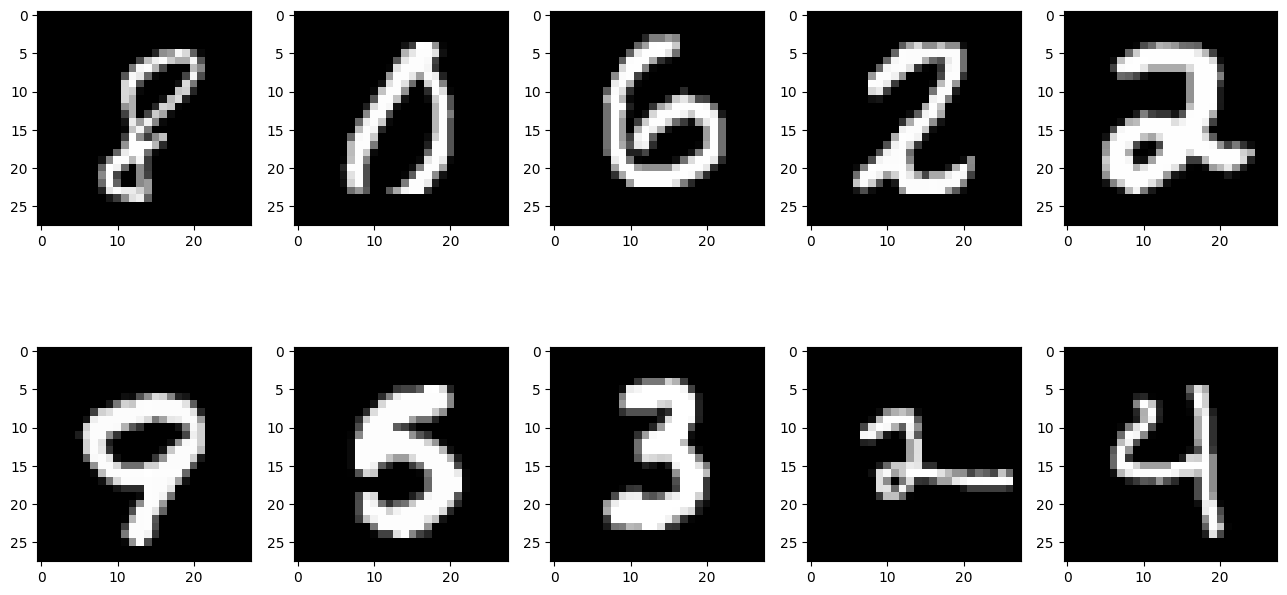

In [17]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [18]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [32]:
model=Sequential()

#model.add(Flatten(input_shape=(28,28)))

#model.add(Dense(64,activation='relu'))
#model.add(Dense(64,input_dim=64,activation='relu'))
#model.add(Dense(32,input_dim=64,activation='relu'))
#model.add(Dense(10,input_dim=32,activation='softmax'))
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#----- a
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
train_info = model.fit(
    new_train_data,
    new_train_target,
    epochs=20,
    batch_size=128,        # larger batch size stabilizes training
    validation_split=0.1   # monitors overfitting
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8366 - loss: 0.5553 - val_accuracy: 0.9632 - val_loss: 0.1260
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9643 - loss: 0.1195 - val_accuracy: 0.9748 - val_loss: 0.0885
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9780 - loss: 0.0720 - val_accuracy: 0.9783 - val_loss: 0.0709
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9851 - loss: 0.0477 - val_accuracy: 0.9772 - val_loss: 0.0736
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9888 - loss: 0.0354 - val_accuracy: 0.9755 - val_loss: 0.0827
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9920 - loss: 0.0267 - val_accuracy: 0.9827 - val_loss: 0.0665
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9925 - loss: 0.0223 - val_accuracy: 0.9765 - val_loss: 0.0875
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9929 - loss: 0.0208 - val_accuracy

In [ ]:
#----- b
model=Sequential()
from tensorflow.keras import regularizers

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_info = model.fit(new_train_data, new_train_target, epochs=20, batch_size=128, validation_split=0.1)


In [33]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

Train the model

In [34]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
 358/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9722 - loss: 0.0988

KeyboardInterrupt: 

Plot the loss and accuracy graphs

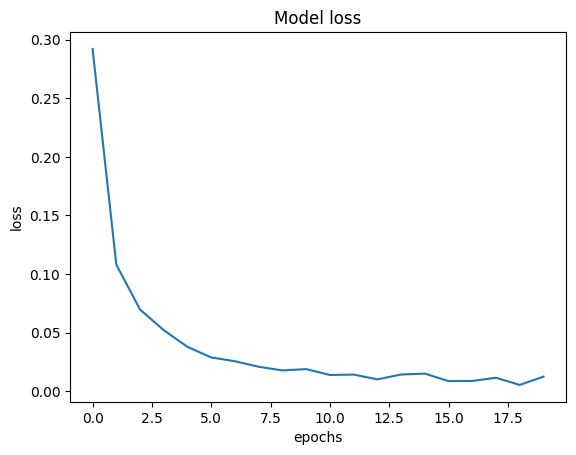

In [35]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

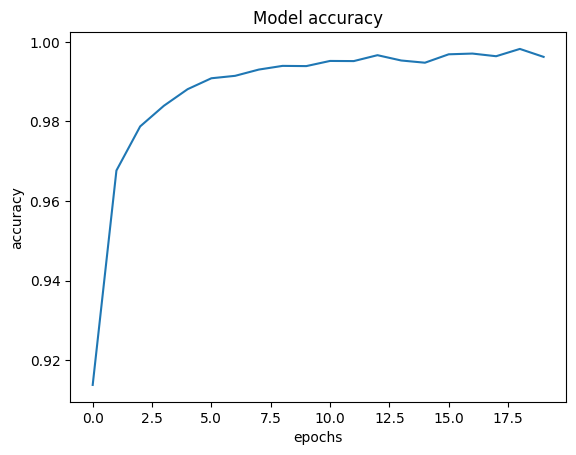

In [36]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [37]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9709 - loss: 0.1063
Loss of the Test dataset is: 0.09354723244905472
Accuracy of the test dataset is: 0.9745000004768372


Save the model weights

In [38]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

#---- C. Visualize class-wise test dataset performance using a confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


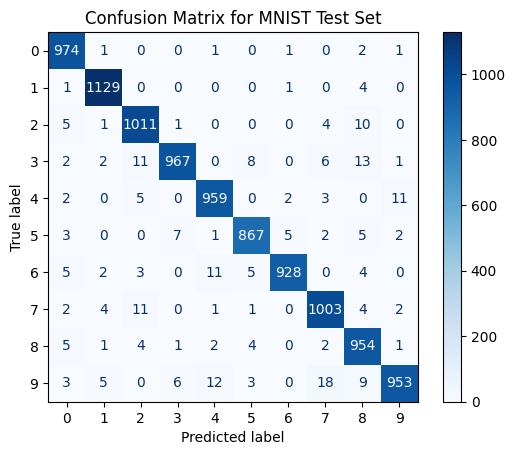

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test dataset
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MNIST Test Set')
plt.show()
